## ***Customer Churn Prediction using Teleco Dataset*** - ***Deepali Krishna Kashyap***

Dataset Source : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# **Step 1: Define Business Problem**

**What is Customer Churn?**
Customer churn, or customer attrition, refers to the percentage of customers who stop using a company's service or product during a given timeframe.

**Why is it Important?**

**Cost-Effective Retention**: Retaining existing customers is generally cheaper than acquiring new ones, making churn prediction and prevention a valuable strategy.

**Revenue Stability**: High churn rates can erode revenue streams and negatively impact a company's bottom line.

**Customer Satisfaction Insights**: Churn can signal underlying issues with customer satisfaction or product quality, providing valuable insights for improvement.

**Competitive Advantage**: Retaining customers and reducing churn can give a business a competitive edge in the market.


In [137]:
# Include Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [138]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive/')
# Set working directory
%cd /content/drive/MyDrive/Personal Projects/Customer Churn Prediction/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Personal Projects/Customer Churn Prediction


Why does this matter? Customer churn leads to revenue loss.

Key questions to answer:

    What are the main reasons customers leave?

    Can we predict churn before it happens?

    What customer segments are most at risk?


# **Step 2 : Data Understanding and Preprocessing**

Clean missing values, convert categorical features, and remove duplicates.

Total Entries: 7,043 customers

Target Variable: Churn (Yes/No) → Indicates whether a customer churned.

Potential Predictors:

    Demographics: gender, SeniorCitizen, Partner, Dependents

    Subscription Details: tenure, Contract, InternetService, PaymentMethod

    Service Features: OnlineSecurity, TechSupport, StreamingTV, DeviceProtection

    Billing Details: MonthlyCharges, TotalCharges, PaperlessBilling



In [139]:
# Read and Display Churn data data
df_CustomerChurn = pd.read_csv('Telco-Customer-Churn.csv')
df_CustomerChurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [140]:
#Display the head of the dataset
df_CustomerChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
#Display the summary of the dataset
df_CustomerChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [142]:
#Describe the details of the dataset
df_CustomerChurn.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [143]:
#Look for missing values in the entire dataset
missing_values = df_CustomerChurn.isnull().sum()
missing_values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [144]:
#Convert the TotalCharges column to numeric and fill missing values with 0
df_CustomerChurn['TotalCharges'] = pd.to_numeric(df_CustomerChurn['TotalCharges'], errors='coerce')
print(df_CustomerChurn['TotalCharges'].isnull().sum())  # To see how many values were affected
df_CustomerChurn['TotalCharges'].fillna(0, inplace=True)

11


<ipython-input-144-b5347cd50ce3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_CustomerChurn['TotalCharges'].fillna(0, inplace=True)


In [145]:
#Verifying if the column total Charges have any missing values
df_CustomerChurn['TotalCharges'].isnull().sum()

np.int64(0)

In [146]:
#Verifying the Churn column before converting it into binary values
df_CustomerChurn['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [147]:
#Converting the Churn values to binary
df_CustomerChurn['Churn'] = df_CustomerChurn['Churn'].map({'No': 0, 'Yes': 1})
print(df_CustomerChurn['Churn'].value_counts())  # To check if values are correctly transformed

Churn
0    5174
1    1869
Name: count, dtype: int64


In [148]:
# Calculate the percentage of churn (where 'Churn' == 1)
churn_percentage = df_CustomerChurn['Churn'].mean() * 100

# Print the percentage of churn
print(f"Percentage of Churn: {churn_percentage:.2f}%")


Percentage of Churn: 26.54%


Therefore there's about 26.54% of Churn rate according to the above data.

In [149]:
#Verify the Total Charges column to check if its numeric.
df_CustomerChurn['TotalCharges'] = pd.to_numeric(df_CustomerChurn['TotalCharges'], errors='coerce')
df_CustomerChurn['TotalCharges'].info()
df_CustomerChurn['TotalCharges'].fillna(df_CustomerChurn['TotalCharges'].median(), inplace=True)

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


<ipython-input-149-8a7e067c8b20>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_CustomerChurn['TotalCharges'].fillna(df_CustomerChurn['TotalCharges'].median(), inplace=True)


Customers with month-to-month contracts might be more likely to churn compared to long-term contract holders.

Higher monthly charges could lead to churn if customers don’t perceive enough value.

Lack of support services (OnlineSecurity, TechSupport, etc.) may indicate higher churn risk.

Payment methods (e.g., Electronic Check) might correlate with higher churn.

# **Step 3: Exploratory Data Analysis (EDA)**

Identify correlations between churn and key factors (e.g., contract type, billing method, monthly charges).

In [150]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

<ipython-input-151-19c935593a2d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


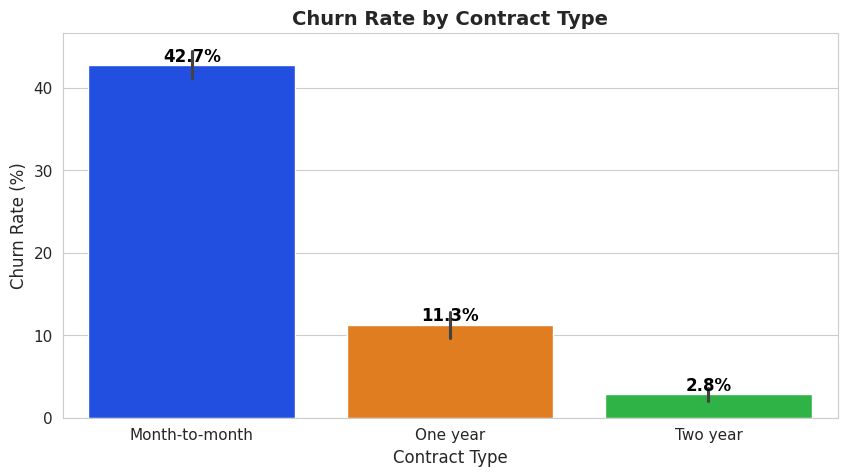

In [151]:
# Create the figure
plt.figure(figsize=(10, 5))

# Create a bar plot with different colors per contract type
ax = sns.barplot(
    x=df_CustomerChurn['Contract'],
    y=df_CustomerChurn['Churn'],
    estimator=lambda x: sum(x) / len(x) * 100,
    palette= "bright" # Change color scheme
)
# Annotate bars with values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Title and labels
plt.title("Churn Rate by Contract Type", fontsize=14, fontweight='bold')
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.xlabel("Contract Type", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Show the plot
plt.show()

<ipython-input-152-32679a5ef3e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_CustomerChurn['Churn'],


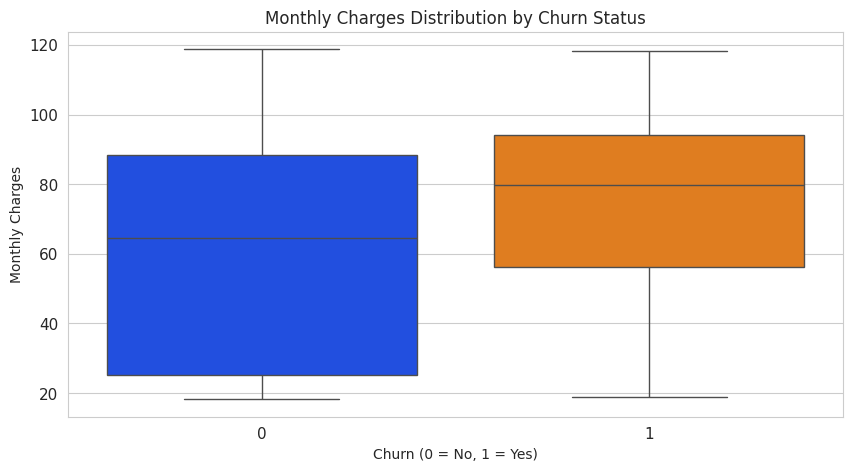

In [152]:
# Step 2: Churn rate by Monthly Charges (Boxplot)
plt.figure(figsize=(10,5))

ax = sns.boxplot(x=df_CustomerChurn['Churn'],
                 y=df_CustomerChurn['MonthlyCharges'],
                 palette="bright")

# Title and labels
plt.title("Monthly Charges Distribution by Churn Status")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Show the plot
plt.show()

<ipython-input-153-87cffa5fab08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_CustomerChurn['InternetService'],


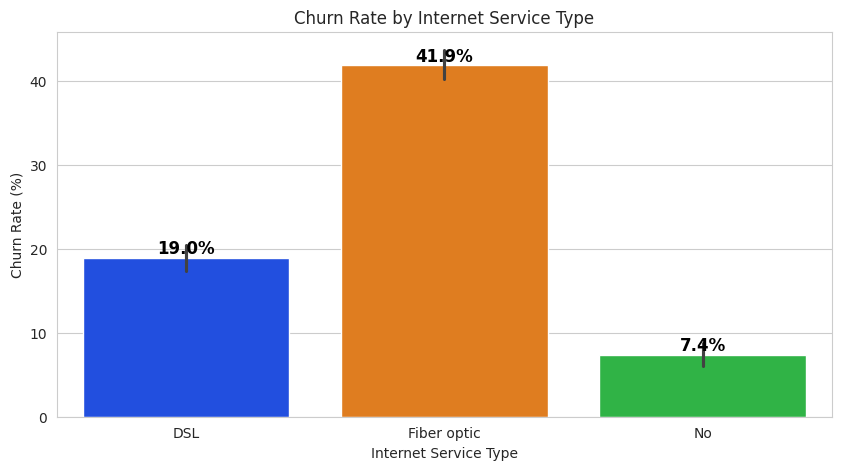

In [153]:
# Step 3: Churn rate by Internet Service Type
plt.figure(figsize=(10,5))

ax = sns.barplot(x=df_CustomerChurn['InternetService'],
                 y=df_CustomerChurn['Churn'],
                 estimator=lambda x: sum(x)/len(x) * 100,
                 palette="bright"
                 )
# Annotate bars with values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Title and labels
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Internet Service Type")

#Show the plot
plt.show()


# **Churn Trend Analysis Insights:**

**Churn by Contract Type:**

        Customers on month-to-month contracts have the highest churn rate.

        Customers with one-year or two-year contracts churn significantly less.

**Churn by Monthly Charges:**

        Higher Monthly Charges seem to be associated with a higher churn rate.

        Customers who churn tend to have higher average monthly charges compared to those who stay.

**Churn by Internet Service Type:**

        Fiber optic users have a higher churn rate compared to DSL and those with no internet service.

        Customers without internet service have the lowest churn rate.

<ipython-input-154-224c0fe8e0d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_CustomerChurn['PaymentMethod'],


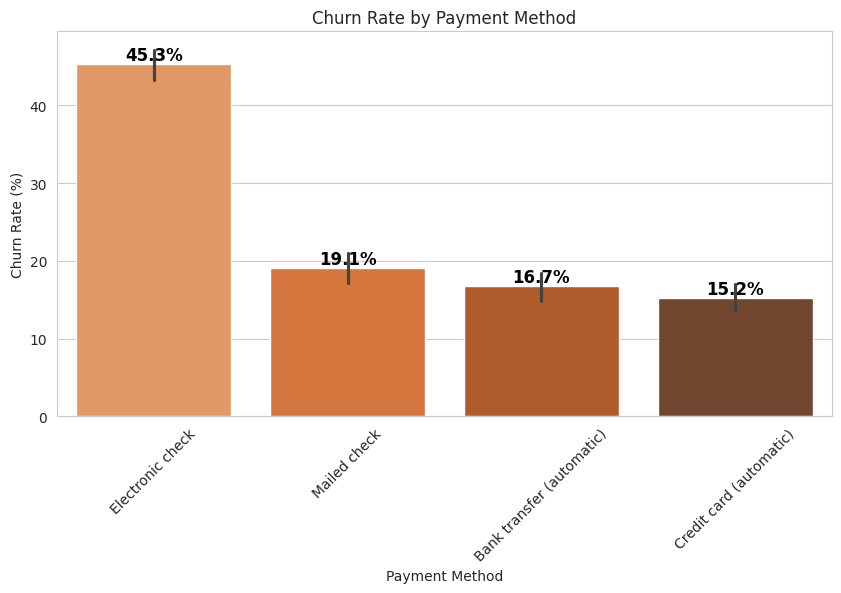

In [154]:
# Step 4: Churn rate by Payment Method
plt.figure(figsize=(10,5))

ax = sns.barplot(x=df_CustomerChurn['PaymentMethod'],
                 y=df_CustomerChurn['Churn'],
                 estimator=lambda x: sum(x)/len(x) * 100,
                 palette="Oranges_d"
                 )
# Annotate bars with values
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=12, fontweight='bold', color='black'
    )

# Title and labels
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Payment Method")
#Show the plot
plt.show()


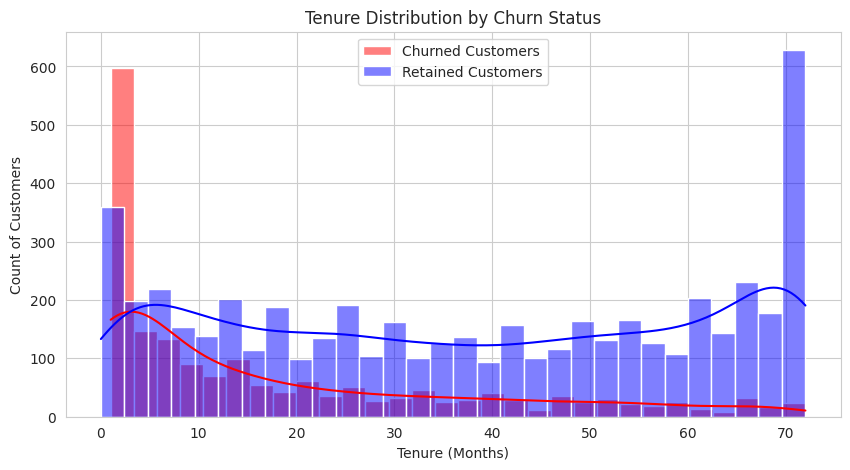

In [155]:
# Step 5: Churn rate by Tenure (Distribution)
plt.figure(figsize=(10,5))
sns.histplot(df_CustomerChurn[df_CustomerChurn['Churn'] == 1]['tenure'], bins=30, kde=True, color="red", label="Churned Customers")
sns.histplot(df_CustomerChurn[df_CustomerChurn['Churn'] == 0]['tenure'], bins=30, kde=True, color="blue", label="Retained Customers")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count of Customers")
plt.legend()
plt.show()

**Churn Rate by Payment Method**

    Electronic check users tend to have the highest churn rate. This could indicate that customers using this method are more likely to be dissatisfied or have inconsistent payment habits.

    Automatic payments (like credit card auto-pay and bank transfers) typically have lower churn rates because they ensure continuous service without manual intervention.

    Customers paying by mailed checks may have a lower churn rate, as they are often more traditional and committed to long-term service.

**Churn Rate by Tenure**

    Customers with shorter tenure (0-12 months) are more likely to churn. This suggests that the first year is critical in customer retention.

    Customers with longer tenure (more than 24 months) have a significantly lower churn rate, indicating higher loyalty.

    There might be a sharp decline in churn for customers staying beyond two years, meaning that once customers commit long-term, they are less likely to leave.

**Key Takeaways**

    Reducing churn among new customers (0-12 months) should be a priority. Strategies could include:

        Offering onboarding support and discounts.

        Enhancing the customer experience in the first year.

    Encouraging automatic payments might help retain customers.

    Providing loyalty incentives for customers around the 1-year mark could reduce churn.

# **Step 4: Feature Engineering**

    Convert categorical variables into numerical format (one-hot encoding).

    Normalize numerical columns like monthly charges and tenure.

In [156]:
# Drop customerID as it's not a useful feature for prediction
df_CustomerChurn.drop(columns=['customerID'], inplace=True)

In [157]:
#Dispalying the head of the dataset after removing the customeID column
df_CustomerChurn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [158]:
# Convert categorical variables using one-hot encoding
df_New_Churn = pd.get_dummies(df_CustomerChurn, drop_first=True)
df_New_Churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# **Step 5: Build Machine Learning Model**

    Train a model to predict churn using:

        Logistic Regression

        Decision Trees / Random Forest

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training & testing sets
X = df_New_Churn.drop(columns=['Churn'])  # Features
y = df_New_Churn['Churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Check dataset shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 30) (1409, 30) (5634,) (1409,)


# **Logistic Regression Model**

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[927 108]
 [165 209]]


# **Random Forest Classifier Model**

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409


Confusion Matrix:
[[921 114]
 [189 185]]


In comparing the Logistic Regression and Random Forest models for customer churn prediction, Logistic Regression performed slightly better, achieving an accuracy of 81% compared to 78% for Random Forest. It also demonstrated a higher recall (56% vs. 49%), meaning it identified more actual churn cases, which is crucial for minimizing customer loss. Additionally, Logistic Regression had a better F1-score (0.60 vs. 0.55), indicating a more balanced trade-off between precision and recall. The confusion matrix further highlights that Logistic Regression had fewer false negatives (165 vs. 189), meaning it missed fewer customers who actually churned. While Random Forest may capture more complex patterns, its performance in this case was slightly inferior.

**Hyperparameter Tuning for Random Forest**

In [162]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Tuned Random Forest Accuracy: {accuracy_best_rf:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



After hyperparameter tuning, the Random Forest model showed significant improvements in performance. The accuracy increased from 78% to 81%, making it more reliable in predicting customer churn. The precision for churned customers improved from 62% to 67%, reducing false positives, while the recall increased from 49% to 53%, meaning the model correctly identified more actual churn cases. Additionally, the F1-score rose from 0.55 to 0.59, indicating a better balance between precision and recall. These enhancements suggest that hyperparameter tuning has led to a more effective churn prediction model.

**Analyze feature Importance**

<ipython-input-163-2040c472437b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


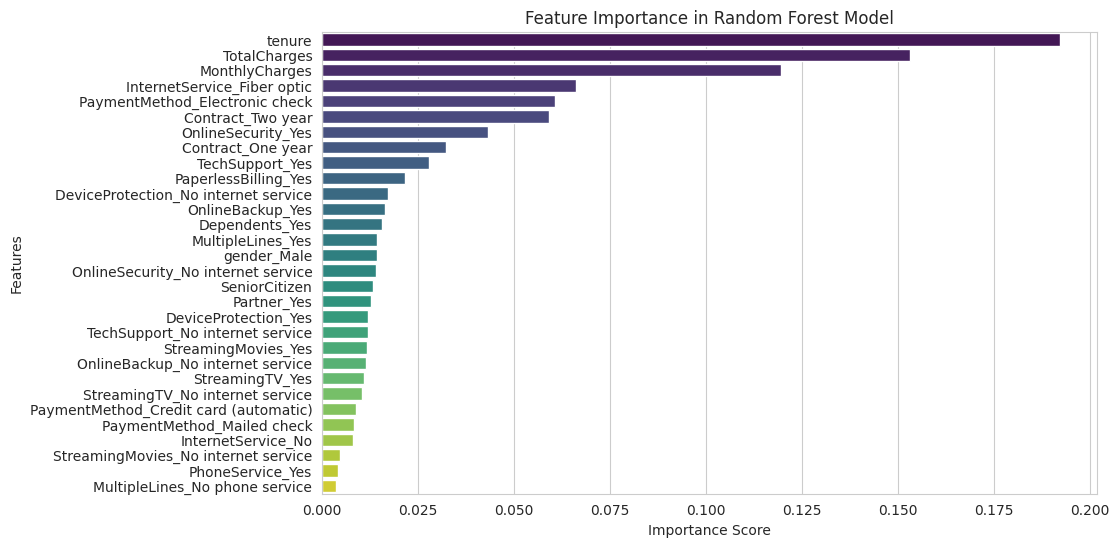

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance values
feature_importance = best_rf_model.feature_importances_

# Create a DataFrame to store feature names and importance values
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


# **Interpretation of Feature Importance Output**

🔹 Tenure (Most Important Factor)

    The longer a customer stays with the company, the less likely they are to churn.

    Retaining customers during the first few months is critical.

🔹 Total Charges & Monthly Charges

    Customers with higher total charges (long-term users) tend to stay.

    However, higher monthly charges may increase the risk of churn.

🔹 Internet Service (Fiber Optic Increases Churn)

    Customers using fiber optic internet are more likely to churn compared to DSL users.

    This could be due to higher costs or service expectations.

🔹 Payment Method (Electronic Check Users More Likely to Churn)

    Customers using electronic checks have higher churn rates.

    This may indicate a lack of commitment compared to users on automatic payments.

🔹 Contract Type (Longer Contracts Reduce Churn)

    Two-year contract users are the least likely to churn.

    Month-to-month contracts lead to the highest churn rates.

🔹 Online Security & Tech Support (Retention Factors)

    Customers with online security and tech support services are less likely to churn.

    These services increase perceived value and satisfaction.

🔹 Paperless Billing (Slightly Higher Churn Risk)

    Customers using paperless billing have slightly higher churn.

    Possibly because they interact less with the company.

🔹 Demographics & Other Factors

    Features like gender, seniority, and dependents have lower impact.

    Multiple lines and streaming services have mixed influence on churn.

### **Churn Prevention Strategy**   

1. **Improve Early Retention** – Offer onboarding support, discounts for first 6 months, and proactive customer success engagement.  
2. **Encourage Long-Term Contracts** – Provide incentives for switching from monthly to annual plans.  
3. **Adjust Pricing Strategies** – Introduce tiered pricing, targeted discounts, and bundled offers.  
4. **Enhance Fiber Optic Service** – Investigate reliability issues and offer exclusive perks.  
5. **Promote Auto-Pay Options** – Encourage credit card or auto-pay sign-ups with incentives.  
6. **Boost Support & Security Features** – Provide free trials of tech support, online security, and backup services.  
7. **Increase Customer Engagement** – Use personalized outreach, billing insights, and live chat support.  
8. **Use Predictive Analytics** – Identify at-risk customers and offer retention-focused solutions.  
